In [1]:
import pandas as pd
import numpy as np
import sys
from itertools import combinations, groupby
from collections import Counter
from IPython.display import display
import json
from fim import apriori, fpgrowth, eclat
import matplotlib.pyplot as plt
import time

In [ ]:
# Source of dataset - http://sideeffects.embl.de/download/
# SIDER contains information on marketed medicines and their recorded adverse drug reactions.

# Data preparation

In [3]:
id_ATC = pd.read_csv('./side_effects/drug_atc.tsv', sep='\t', header=None, names=['id', 'ATC'])

In [4]:
drugs = pd.read_csv('./side_effects/drug_atc.tsv', sep='\t', header=None, names=['id', 'ATC']).merge(pd.read_csv('./side_effects/drug_names.tsv', sep='\t', header=None, names=['id', 'name']) )

In [5]:
id_name = pd.read_csv('./side_effects/drug_names.tsv', sep='\t', header=None, names=['id', 'name'])

,id,name
0,CID100000085,carnitine
1,CID100000119,gamma-aminobutyric
2,CID100000137,5-aminolevulinic
3,CID100000143,leucovorin
4,CID100000146,5-methyltetrahydrofolate
...,...,...
1425,CID156603655,pegaptanib
1426,CID156842239,n-3
1427,CID170683024,x
1428,CID170695640,colestyramine


In [6]:
dataset = pd.read_csv('./side_effects/meddra_all_se.tsv', sep='\t', header=None, 
            names=['id_1', 'id_2', 'UMLS_id', 'MedDRA_type', 'UMLS_id_for_MedDRA', 'side_effect'])

dataset=dataset[['id_1', 'id_2', 'side_effect']]
#dataset = dataset['id_1'].map(id_name.set_index('id')['name'])
#dataset = dataset['id_2'].map(id_name.set_index('id')['name'])
dataset

,id_1,id_2,side_effect
0,CID100000085,CID000010917,Abdominal cramps
1,CID100000085,CID000010917,Abdominal pain
2,CID100000085,CID000010917,Abdominal pain
3,CID100000085,CID000010917,Gastrointestinal pain
4,CID100000085,CID000010917,Abdominal pain
...,...,...,...
309844,CID171306834,CID071306834,Respiratory failure
309845,CID171306834,CID071306834,Abnormal vision
309846,CID171306834,CID071306834,Visual impairment
309847,CID171306834,CID071306834,Warts


In [7]:
dataset = dataset.groupby(['id_1','id_2'])['side_effect'].apply(list)
dataset
#.to_csv('12345.csv', index=False)

id_1          id_2        
CID100000085  CID000010917    [Abdominal cramps, Abdominal pain, Abdominal p...
CID100000119  CID000000119    [Anaphylactic shock, Anaphylactic shock, Angio...
CID100000137  CID000000137    [Anaemia, Anaemia, Aphasia, Aphasia, Mental di...
CID100000143  CID000000143    [Alopecia, Alopecia, Anorexia, Decreased appet...
              CID000006006    [Alopecia, Alopecia, Anorexia, Decreased appet...
                                                    ...                        
CID156603655  CID056603655    [Anaphylactic shock, Anaphylactic shock, Angio...
CID156842239  CID056842239    [Anaphylactic shock, Anaphylactic shock, Const...
CID170683024  CID070683024    [Angioedema, Angioedema, Chest pain, Chest pai...
CID170695640  CID070695640    [Abdominal pain, Gastrointestinal pain, Abdomi...
CID171306834  CID071306834    [Abdominal distension, Abdominal distension, A...
Name: side_effect, Length: 1556, dtype: object

In [8]:
#drugs_id_and_side_effects = dataset.to_frame().reset_index().values

In [9]:
transactions = []
for item in dataset.values:
    transactions.append(list(set(item)))

In [10]:
transactions[0:4]

[['Palpitations',
  'Vomiting',
  'Muscular weakness',
  'Dyspnoea',
  'Gastritis',
  'Decreased appetite',
  'Anorexia',
  'Myasthenia',
  'Pain',
  'Gastrointestinal disorder',
  'Hyperkalaemia',
  'Weight increased',
  'Paraesthesia',
  'Injury',
  'Skin odour abnormal',
  'Renal failure',
  'Rash',
  'Anaemia',
  'Gastric atony',
  'Angiopathy',
  'Abdominal pain',
  'Urinary tract infection',
  'Hypotension',
  'Melaena',
  'Body odor',
  'Diarrhoea',
  'Infection',
  'Haemorrhage',
  'Fluid overload',
  'Dyspepsia',
  'Dysgeusia',
  'Parathyroid disorder',
  'Cough',
  'Haemoglobin',
  'Amblyopia',
  'Back pain',
  'Rhinitis',
  'Hypertonia',
  'Chest pain',
  'Injection site reaction',
  'Sinusitis',
  'Influenza',
  'Depression',
  'Dermatitis',
  'Insomnia',
  'Hypercalcaemia',
  'Vertigo',
  'Musculoskeletal discomfort',
  'Hypertension',
  'Abdominal cramps',
  'Eye disorder',
  'Gastrointestinal pain',
  'Constipation',
  'Pruritus',
  'Headache',
  'Tachycardia',
  'Cardio

## Done

In [39]:
pd.set_option("max_colwidth", 150)

In [40]:
support=50
confidence=70 # don't need here
target='all'
zmin=2

# Apriori

In [41]:
start=time.perf_counter()
fi_apriori = apriori(tracts=transactions, target=target, supp=support, conf=confidence, zmin=zmin)
end=time.perf_counter()
print(end-start)

0.021311898000021756


In [42]:
df_apriori = pd.DataFrame.from_records(fi_apriori).sort_values(by=[1],ascending=False).reset_index(drop=True)
df_apriori

,0,1
0,"(Rash, Dermatitis)",1158
1,"(Vomiting, Nausea)",1150
2,"(Headache, Nausea)",1103
3,"(Dermatitis, Nausea)",1069
4,"(Rash, Nausea)",1069
...,...,...
167,"(Asthenia, Vomiting, Dermatitis)",779
168,"(Gastrointestinal pain, Vomiting, Nausea)",779
169,"(Diarrhoea, Vomiting, Rash, Headache, Nausea)",778
170,"(Pruritus, Rash, Dermatitis, Headache)",778


# FP-Growth

In [43]:
start=time.perf_counter()
fi_fpgrowth = fpgrowth(tracts=transactions, target=target, supp=support, conf=confidence, zmin=zmin)
end=time.perf_counter()
print(end-start)

0.019804991999990307


In [44]:
df_fpgrowth = pd.DataFrame.from_records(fi_fpgrowth).sort_values(by=[1],ascending=False).reset_index(drop=True)
df_fpgrowth

,0,1
0,"(Rash, Dermatitis)",1158
1,"(Vomiting, Nausea)",1150
2,"(Headache, Nausea)",1103
3,"(Dermatitis, Nausea)",1069
4,"(Rash, Nausea)",1069
...,...,...
167,"(Diarrhoea, Vomiting, Rash, Dermatitis, Headache)",779
168,"(Hypersensitivity, Dizziness)",779
169,"(Pruritus, Rash, Dermatitis, Headache)",778
170,"(Diarrhoea, Vomiting, Rash, Headache, Nausea)",778


# ECLAT

In [45]:
start=time.perf_counter()
fi_eclat = eclat(tracts=transactions, target=target, supp=support, conf=confidence, zmin=zmin)
end=time.perf_counter()
print(end-start)

0.01995872599991344


In [46]:
df_fi_eclat = pd.DataFrame.from_records(fi_eclat).sort_values(by=[1],ascending=False).reset_index(drop=True)
df_fi_eclat

,0,1
0,"(Rash, Dermatitis)",1158
1,"(Vomiting, Nausea)",1150
2,"(Headache, Nausea)",1103
3,"(Rash, Nausea)",1069
4,"(Dermatitis, Nausea)",1069
...,...,...
167,"(Gastrointestinal pain, Vomiting, Nausea)",779
168,"(Diarrhoea, Rash, Dermatitis, Headache, Vomiting)",779
169,"(Pruritus, Headache, Rash, Dermatitis)",778
170,"(Asthenia, Dermatitis, Dizziness)",778


## Frequent item sets

In [51]:
df_fi_eclat.values.tolist()

[[('Rash', 'Dermatitis'), 1158],
 [('Vomiting', 'Nausea'), 1150],
 [('Headache', 'Nausea'), 1103],
 [('Rash', 'Nausea'), 1069],
 [('Dermatitis', 'Nausea'), 1069],
 [('Rash', 'Dermatitis', 'Nausea'), 1054],
 [('Dizziness', 'Nausea'), 1049],
 [('Dizziness', 'Headache'), 1030],
 [('Diarrhoea', 'Nausea'), 1021],
 [('Vomiting', 'Headache'), 996],
 [('Dermatitis', 'Headache'), 994],
 [('Rash', 'Headache'), 989],
 [('Vomiting', 'Dermatitis'), 986],
 [('Vomiting', 'Headache', 'Nausea'), 985],
 [('Vomiting', 'Rash'), 982],
 [('Rash', 'Dermatitis', 'Headache'), 979],
 [('Dizziness', 'Headache', 'Nausea'), 976],
 [('Vomiting', 'Dermatitis', 'Nausea'), 975],
 [('Vomiting', 'Rash', 'Nausea'), 972],
 [('Vomiting', 'Rash', 'Dermatitis'), 971],
 [('Diarrhoea', 'Vomiting'), 964],
 [('Vomiting', 'Rash', 'Dermatitis', 'Nausea'), 961],
 [('Diarrhoea', 'Vomiting', 'Nausea'), 956],
 [('Dizziness', 'Vomiting'), 952],
 [('Dermatitis', 'Headache', 'Nausea'), 946],
 [('Dizziness', 'Dermatitis'), 946],
 [('Dizzi

In [52]:
df_fi_eclat.values.tolist()[0]

[('Rash', 'Dermatitis'), 1158]

In [53]:
df_fi_eclat.values.tolist()[-1]

[('Diarrhoea', 'Rash', 'Headache', 'Vomiting', 'Nausea'), 778]

# Фиксированный набор данных, изменяемый порог поддержки

In [22]:
supps = [21,25,30,40,50,60,70,74]

a = []
fp = []
e = []

fi_fpgrowth=[]

fr_it_set_size = []          # 2
fi_it_set_max_len = []       # 3
num_of_unique_fr_it_set = [] # 4

In [23]:
for supp in supps:
    start_a = time.perf_counter()
    fi_apriori = apriori(tracts=transactions, target=target, supp=supp, conf=confidence, zmin=zmin)
    end_a = time.perf_counter()
    
    start_fp = time.perf_counter()
    fi_fpgrowth = fpgrowth(tracts=transactions, target=target, supp=supp, conf=confidence, zmin=zmin)
    end_fp = time.perf_counter()
    
    ####
    
    fr_it_set_size.append(len(fi_fpgrowth))
    
    size=[0,]
    for i in range(len(fi_fpgrowth)):
        size.append(len(fi_fpgrowth[i][0]))
    fi_it_set_max_len.append(max(size))
    
    size=[]
    for i in range(len(fi_fpgrowth)):
        size.append(len(fi_fpgrowth[i][0]))     
    num_of_unique_fr_it_set.append(len(set(size)))
    
    ####
    
    start_e = time.perf_counter()
    fi_e = eclat(tracts=transactions, target=target, supp=supp, conf=confidence, zmin=zmin)
    end_e = time.perf_counter()
    
    a.append(end_a-start_a)
    fp.append(end_fp-start_fp)
    e.append(end_e-start_e)

### 1. Сравнение быстродействия алгоритмов 

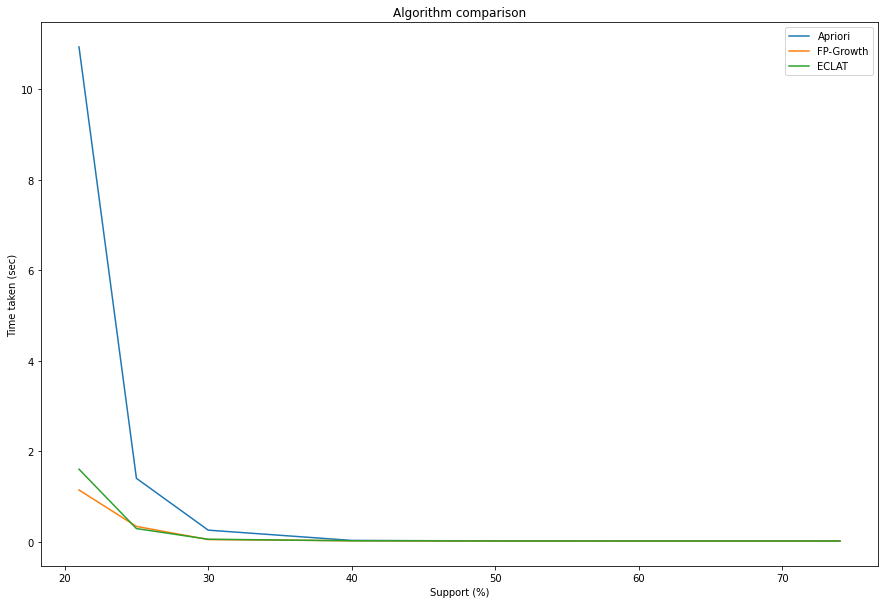

In [24]:
plt.plot(supps, a, label = "Apriori")
plt.plot(supps, fp, label = "FP-Growth")
plt.plot(supps, e, label = "ECLAT")

plt.xlabel('Support (%)')
plt.ylabel('Time taken (sec)')
plt.title('Algorithm comparison')
plt.legend(loc='best')

fig = plt.gcf()
fig.set_size_inches(15,10) 

plt.show()

In [25]:
print("Apriori:    FP-Growth:   ECLAT:")
for i in range(len(a)):
    print( "{:7.2f} {:13.2f} {:8.2f}".format(a[i],fp[i],e[i]) )

Apriori:    FP-Growth:   ECLAT:
  10.94          1.15     1.61
   1.40          0.34     0.29
   0.26          0.05     0.06
   0.03          0.02     0.02
   0.02          0.02     0.02
   0.02          0.02     0.02
   0.02          0.02     0.02
   0.02          0.02     0.02


### 2. Общее количество частых наборов объектов

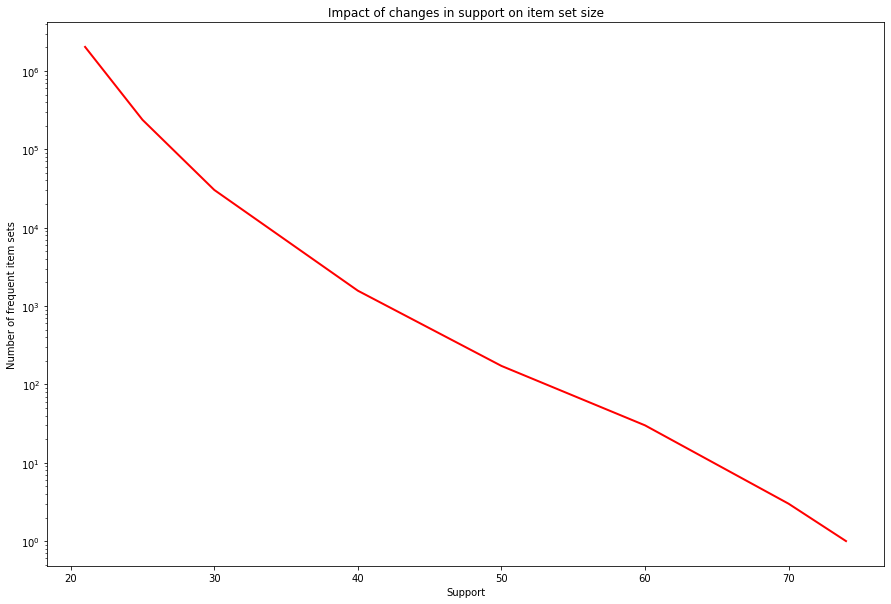

In [26]:
plt.plot(supps, fr_it_set_size, color='red', lw=2)

plt.xlabel('Support')
plt.ylabel('Number of frequent item sets')
plt.title('Impact of changes in support on item set size')
plt.yscale('log')

fig = plt.gcf()
fig.set_size_inches(15,10) 

plt.show()

In [27]:
print(supps)
print(fr_it_set_size)

[21, 25, 30, 40, 50, 60, 70, 74]
[2025244, 237675, 30273, 1568, 172, 30, 3, 1]


### 3. Максимальная длина частого набора объектов

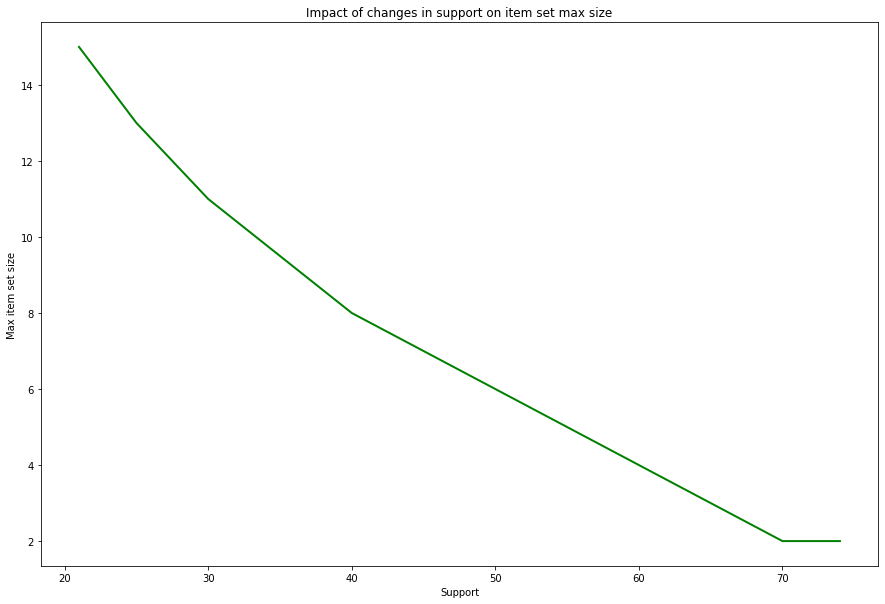

In [28]:
plt.plot(supps, fi_it_set_max_len, color='green', lw=2)

plt.xlabel('Support')
plt.ylabel('Max item set size')
plt.title('Impact of changes in support on item set max size')

fig = plt.gcf()
fig.set_size_inches(15,10) 

plt.show()

### 4. Количество частых наборов объектов различной длины

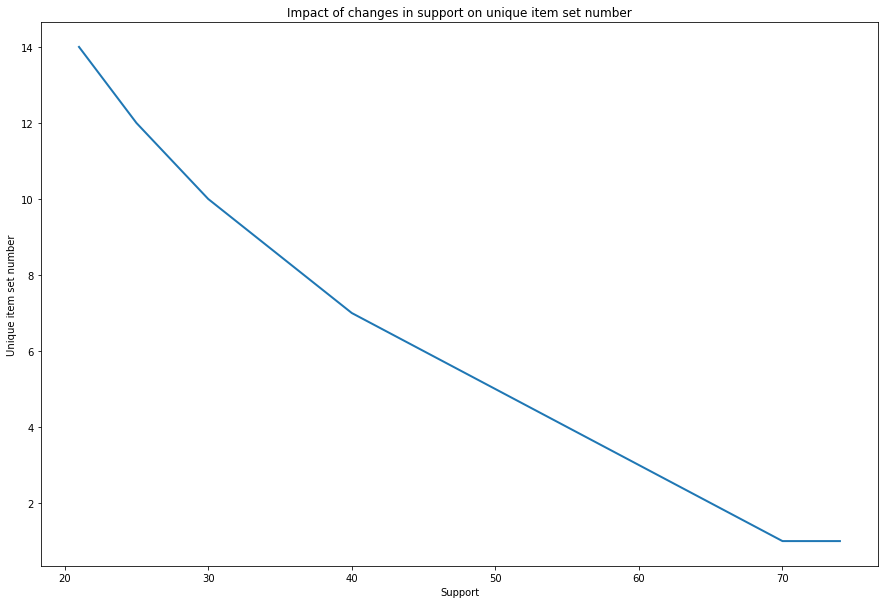

In [29]:
plt.plot(supps, num_of_unique_fr_it_set, lw=2)

plt.xlabel('Support')
plt.ylabel('Unique item set number')
plt.title('Impact of changes in support on unique item set number')

fig = plt.gcf()
fig.set_size_inches(15,10) 

plt.show()

### Some other data (useless for current task?)

In [30]:
# not so useful, but you can exclude placebo
pd.read_csv('./side_effects/meddra_freq.tsv', sep='\t', header=None, 
            names=['id_1', 'id_2', 'UMLS_id', 'placebo', 'frequency', 
                   'lower_bound', 'upper_bound', 'MedDRA_type', 'UMLS_id_for_MedDRA', 'side_effect'])

In [31]:
pd.read_csv('./side_effects/meddra.tsv', sep='\t', header=None, 
            names=['UMLS_id', 'MedDRA_id', 'kind of term', 'side_effect'])

In [32]:
pd.read_csv('./side_effects/meddra_all_indications.tsv', sep='\t', header=None, 
            names=['id_1', 'UMLS_id', 'detection_method', 'concept_name', 
                   'MedDRA_type', 'UMLS_id_for_MedDRA', 'MedDRA_concept_name'])

In [33]:
# meddra_all_label_indications.tsv.gz and meddra_all_label_se.tsv.gz
# These files contain the same data as the indications/se files, but with 
# an additional first column showing the source label.

pd.read_csv('./side_effects/meddra_all_label_indications.tsv', sep='\t', header=None)
pd.read_csv('./side_effects/meddra_all_label_se.tsv', sep='\t', header=None)